## Análise exploratória dos dados

### Preços Históricos de criptomoedas

Conteúdo

- Date: data da observação
- Open : Preço de abertura no dia determinado
- High: preço mais alto no dia determinado
- Low: Preço mais baixo no dia determinado
- Close : Preço de fechamento no dia determinado
- Volume : Volume de transações no dia determinado
- Marketcap: capitalização de mercado em USD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [17]:
# Carregando todos os arquivos da pasta
pasta_path = r"C:\Users\allan\Projetos Python\StackLabs3_Sklearn\Stack_Labs_3_Squad_Scikit-Learn\Arquivos"
lista_arquivos = glob.glob(pasta_path + "/*.csv")
df_cripto = pd.DataFrame(pd.read_csv(lista_arquivos[0]))
for i in range(1,len(lista_arquivos)):
    data = pd.read_csv(lista_arquivos[i])
    df = pd.DataFrame(data)
    df_cripto = pd.concat([df_cripto,df],axis=0)

In [3]:
df_cripto.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [4]:
df_cripto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37082 entries, 0 to 2892
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
df_cripto.Name.value_counts()

Litecoin           2991
Bitcoin            2991
XRP                2893
Dogecoin           2760
Monero             2602
Stellar            2527
Tether             2318
NEM                2288
Ethereum           2160
IOTA               1484
EOS                1466
Binance Coin       1442
TRON               1392
Chainlink          1385
Cardano            1374
USD Coin           1002
Crypto.com Coin     935
Wrapped Bitcoin     888
Cosmos              845
Solana              452
Polkadot            320
Uniswap             292
Aave                275
Name: Name, dtype: int64

In [6]:
df_cripto.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [7]:
df_btc = df_cripto.query("Name == 'Bitcoin'")
df_btc = df_btc[["Date", "Close"]]
df_btc.head()

,Date,Close
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000


<AxesSubplot:title={'center':'Historico do preço das moedas'}>

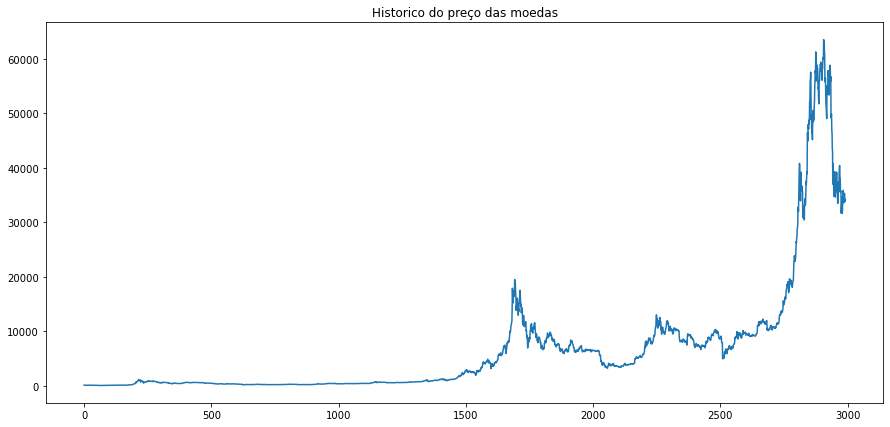

In [8]:
df_btc["Close"].plot(x="Data", figsize= (15,7), title = "Historico do preço das moedas")

In [9]:
# Plotly
figura = px.line(title = "Histórico do preço das ações")
figura.add_scatter(x=df_btc["Date"], y=df_btc["Close"])
figura.show()